In [1]:
# Assignment #4 - Final Assignment 
#"How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?"

In [2]:
# loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
# Seaborn for plotting and styling
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading respective data
dataset = pd.read_csv('survey.csv')
dataset.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# Preprocessing data for further analysis
# Checking the null values


dataset.isnull()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1257,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [5]:
dataset.describe

<bound method NDFrame.describe of                 Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment

In [6]:
# Checking for Duplicates
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Length: 1259, dtype: bool

In [7]:
# Dropping Duplicates

dataset.drop_duplicates()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [8]:

#Convert Data into a Dataframe

df=pd.DataFrame(dataset, columns =['Timestamp','Age','work_interfere','Gender','Country','state','comments','phys_health_consequence','mental_health_consequence','mental_health_interview','phys_health_interview','wellness_program','treatment','benefits','family_history'])


In [9]:
# Overall data and also we can see top 10 or bottom 10, just mentioned in bracket besides head accordingly

df.head()

,Timestamp,Age,work_interfere,Gender,Country,state,comments,phys_health_consequence,mental_health_consequence,mental_health_interview,phys_health_interview,wellness_program,treatment,benefits,family_history
0,2014-08-27 11:29:31,37,Often,Female,United States,IL,NaN,No,No,No,Maybe,No,Yes,Yes,No
1,2014-08-27 11:29:37,44,Rarely,M,United States,IN,NaN,No,Maybe,No,No,Don't know,No,Don't know,No
2,2014-08-27 11:29:44,32,Rarely,Male,Canada,NaN,NaN,No,No,Yes,Yes,No,No,No,No
3,2014-08-27 11:29:46,31,Often,Male,United Kingdom,NaN,NaN,Yes,Yes,Maybe,Maybe,No,Yes,No,Yes
4,2014-08-27 11:30:22,31,Never,Male,United States,TX,NaN,No,No,Yes,Yes,Don't know,No,Yes,No


In [10]:
# Converting  "timestamp" column data to datetime for our further working

df['Timestamp'] = pd.to_datetime(df['Timestamp'])



In [11]:
#Verifying the conversion(type of column is ocnverted to datetime or not)

df.dtypes

Timestamp                    datetime64[ns]
Age                                   int64
work_interfere                       object
Gender                               object
Country                              object
state                                object
comments                             object
phys_health_consequence              object
mental_health_consequence            object
mental_health_interview              object
phys_health_interview                object
wellness_program                     object
treatment                            object
benefits                             object
family_history                       object
dtype: object

In [12]:
# Removing all NAN(not applicable values from the rows data to generate good filtered data)
df2=df.dropna()
print(df2)

               Timestamp  Age work_interfere  Gender        Country state  \
13   2014-08-27 11:33:26   36          Never    Male  United States    CT   
15   2014-08-27 11:34:00   29         Rarely  female  United States    IL   
24   2014-08-27 11:36:48   33         Rarely    male  United States    CA   
25   2014-08-27 11:37:08   35      Sometimes    male  United States    TN   
33   2014-08-27 11:39:36   42      Sometimes    Male  United States    WA   
...                  ...  ...            ...     ...            ...   ...   
1186 2014-11-06 11:24:38   56         Rarely  female  United States    OR   
1190 2015-01-03 03:38:30   44      Sometimes       M  United States    OH   
1219 2015-02-21 09:48:13   38      Sometimes    Male  United States    TX   
1221 2015-02-21 10:45:51   46      Sometimes    male  United States    MD   
1249 2015-07-22 18:57:54   30      Sometimes       M  United States    CA   

                                               comments  \
13    I'm not on

In [27]:
# printing values after removing NAN values
df2.head()

,Timestamp,Age,work_interfere,Gender,Country,state,comments,phys_health_consequence,mental_health_consequence,mental_health_interview,phys_health_interview,wellness_program,treatment,benefits,family_history,Attitudes,Work_interfere_illness,Zone,illness
13,2014-08-27 11:33:26,36,Never,Male,United States,CT,I'm not on my company's health insurance which...,No,No,No,No,No,No,Don't know,Yes,Positive_Attitude,Positive_interfere_illness,North_east_zone,Negative_illness
15,2014-08-27 11:34:00,29,Rarely,female,United States,IL,I have chronic low-level neurological issues t...,No,No,Maybe,Maybe,No,Yes,Yes,Yes,Positive_Attitude,Rare_interfere_illness,Middle_West_zone,Negative_illness
24,2014-08-27 11:36:48,33,Rarely,male,United States,CA,Relatively new job. Ask again later,No,No,No,Yes,Don't know,Yes,Yes,Yes,Positive_Attitude,Rare_interfere_illness,West_zone,Negative_illness
25,2014-08-27 11:37:08,35,Sometimes,male,United States,TN,Sometimes I think about using drugs for my me...,No,Yes,No,Yes,No,Yes,Yes,Yes,Negative_Attitude,Average_interfere_illness,South_zone,Negative_illness
33,2014-08-27 11:39:36,42,Sometimes,Male,United States,WA,I selected my current employer based on its po...,No,Maybe,Maybe,Yes,Yes,Yes,Yes,Yes,Average_Attitude,Average_interfere_illness,West_zone,Negative_illness


<AxesSubplot:xlabel='Age', ylabel='Density'>

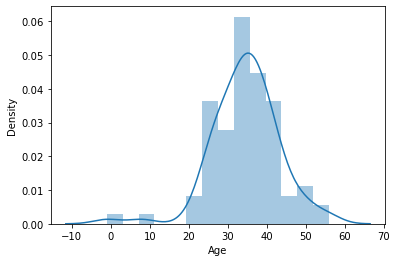

In [28]:
# Ploting a histogram of the distribution of ages

sns.distplot(df2.Age)

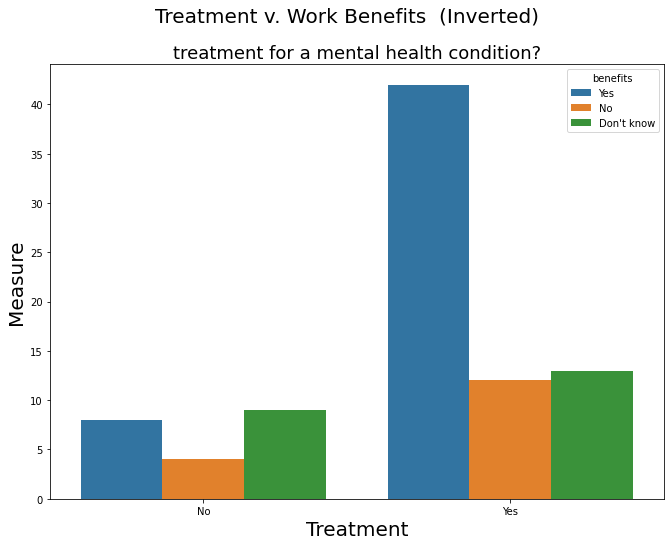

In [29]:
 # Generating a graph comparing mental health benefits and treatment
    
plt.figure(figsize=(11,8))
sns.countplot(x="treatment", hue="benefits", hue_order = ["Yes", "No", "Don't know"], data=df2)
plt.suptitle("Treatment v. Work Benefits  (Inverted)", fontsize=20)
plt.title("treatment for a mental health condition?",fontsize=18)
plt.xlabel("Treatment", fontsize= 20)
plt.ylabel("Measure", fontsize= 20)
plt.show()

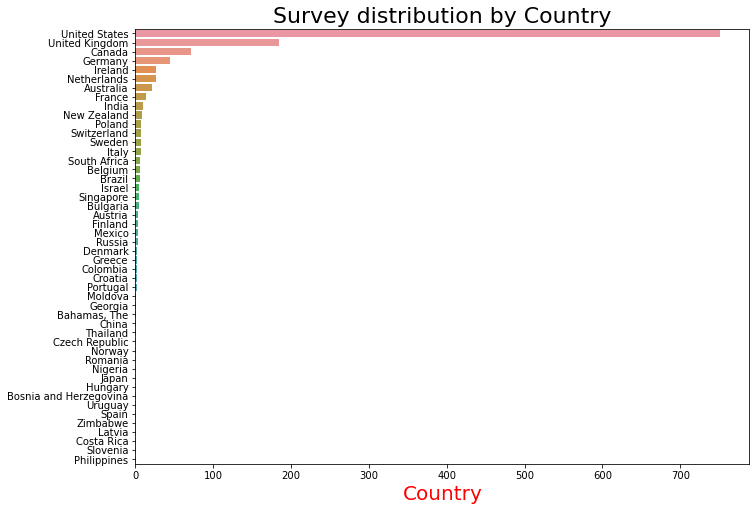

In [30]:
# Create a frequency chart for "country" before removing NAN values

plt.figure(figsize=(11, 8))
sns.countplot(y='Country', order = df['Country'].value_counts().index, data=df)
plt.title('Survey distribution by Country', fontsize=22)
plt.xlabel('Country', fontsize=20, color= 'red')
plt.ylabel('')
plt.show()

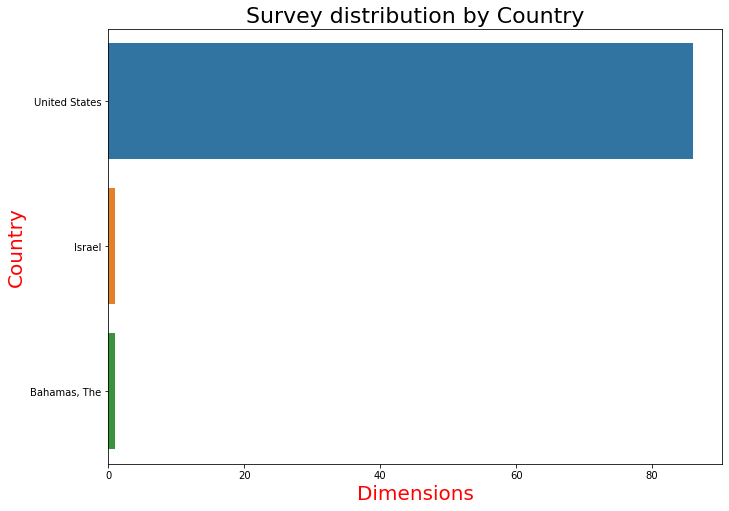

In [31]:
# Create a frequency chart for "country" After removing NAN values

plt.figure(figsize=(11, 8))
sns.countplot(y='Country', order = df2['Country'].value_counts().index, data=df2)
plt.title('Survey distribution by Country', fontsize=22)
plt.xlabel('Dimensions', fontsize=20, color= 'red')
plt.ylabel('Country', fontsize=20, color='red')
plt.show()

In [32]:
# Now, to find our mental health illness and attitude vary by geographic location. we need to set variable into new name fro better ploting and understanding of graph.

# Convert the mental_health_consequence responses into a new variable, 

# Make a copy of the column to preserve the original data. Work with the new column going forward.
df2['Attitudes'] = df2['mental_health_consequence']

# Assign each type of response to one of two categories
Average_Attitude = ['Maybe']
Positive_Attitude = ["No"]
Negative_Attitude = ["Yes"]

df2['Attitudes'] = df2['Attitudes'].apply(lambda x:"Average_Attitude" if x in Average_Attitude else x)
df2['Attitudes'] = df2['Attitudes'].apply(lambda x:"Positive_Attitude" if x in Positive_Attitude else x)
df2['Attitudes'] = df2['Attitudes'].apply(lambda x:"Negative_Attitude" if x in Negative_Attitude else x)



In [33]:
#Before Removing NAN value
# Now, to find our mental health illness and attitude vary by geographic location. we need to set variable into new name fro better ploting and understanding of graph.

# Convert the mental_health_consequence responses into a new variable, 

# Make a copy of the column to preserve the original data. Work with the new column going forward.
df['Attitudes'] = df['mental_health_consequence']

# Assign each type of response to one of two categories
Average_Attitude = ['Maybe']
Positive_Attitude = ["No"]
Negative_Attitude = ["Yes"]

df2['Attitudes'] = df2['Attitudes'].apply(lambda x:"Average_Attitude" if x in Average_Attitude else x)
df2['Attitudes'] = df2['Attitudes'].apply(lambda x:"Positive_Attitude" if x in Positive_Attitude else x)
df2['Attitudes'] = df2['Attitudes'].apply(lambda x:"Negative_Attitude" if x in Negative_Attitude else x)



In [34]:
#After Removing NAN value illness according to work interfere
# Now, to find our  Work_interdere vary by geographic location. we need to set variable into new name fro better ploting and understanding of graph.

# Convert the mental_health_consequence responses into a new variable, 

# Make a copy of the column to preserve the original data. Work with the new column going forward.
df2['Work_interfere_illness'] = df2['work_interfere']

# Assign each type of response to one of two categories
Average_interfere_illness= ["Sometimes"]
Rare_interfere_illness= ['Rarely']
Positive_interfere_illness = ["Never"]
Negative_interfere_illness = ["Often"]

df2['Work_interfere_illness'] = df2['Work_interfere_illness'].apply(lambda x:"Average_interfere_illness" if x in Average_interfere_illness else x)
df2['Work_interfere_illness'] = df2['Work_interfere_illness'].apply(lambda x:"Rare_interfere_illness" if x in Rare_interfere_illness else x)
df2['Work_interfere_illness'] = df2['Work_interfere_illness'].apply(lambda x:"Positive_interfere_illness" if x in Positive_interfere_illness else x)
df2['Work_interfere_illness'] = df2['Work_interfere_illness'].apply(lambda x:"Negative_interfere_illness" if x in Negative_interfere_illness else x)





In [35]:
#Dividing Countries and States into region/zone, to visualise data more effectively and efficiently.


df2['Zone'] = df['state']

# Dividing different statesaccording to different zones and regions.

West_zone = ["WA", "OR", "CA", "NV", "ID", "MT", "WY", "UT", "AZ", "NM", "CO"]
Middle_West_zone = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "OH", "MI"]
North_east_zone = ["ME",  "NH", "VT", "MA", "CT", "RI", "NY", "PA", "NJ"]
South_zone = ["MD", "DE", "DC", "WV",  "VA", "NC","SC", "GA", "FL", "KY", "TN", "AL", "MS", "AR", "LA", "OK", "TX"]

df2['Zone'] = df2['Zone'].apply(lambda x:"West_zone" if x in West_zone else x)
df2['Zone'] = df2['Zone'].apply(lambda x:"Middle_West_zone" if x in Middle_West_zone else x)
df2['Zone'] = df2['Zone'].apply(lambda x:"North_east_zone" if x in North_east_zone else x)
df2['Zone'] = df2['Zone'].apply(lambda x:"South_zone" if x in South_zone else x)


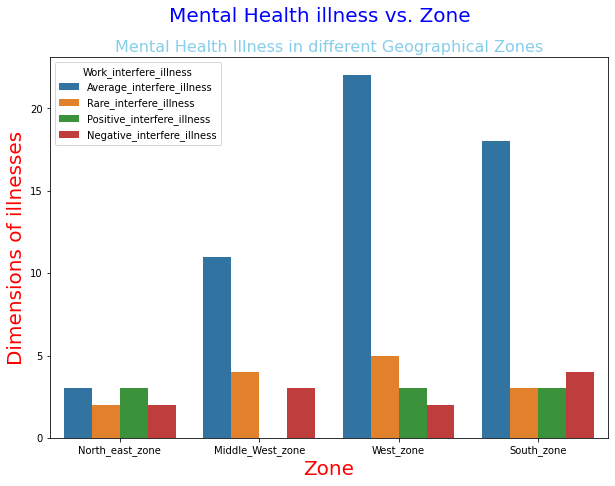

None


In [36]:
# Display the relationship between "mental_health_consequence" that is attitudes and "Zone"

plt.figure(figsize=(10,7))
sns.countplot(x="Zone", hue="Work_interfere_illness", hue_order = ["Average_interfere_illness", "Rare_interfere_illness", "Positive_interfere_illness","Negative_interfere_illness"], data=df2)
plt.suptitle("Mental Health illness vs. Zone", fontsize=20, color ='blue')
plt.title("Mental Health Illness in different Geographical Zones", fontsize=16, color= 'skyblue')
plt.xlabel("Zone",fontsize=20, color='red')
plt.ylabel("Dimensions of illnesses",fontsize=20, color='red')
print(plt.show())

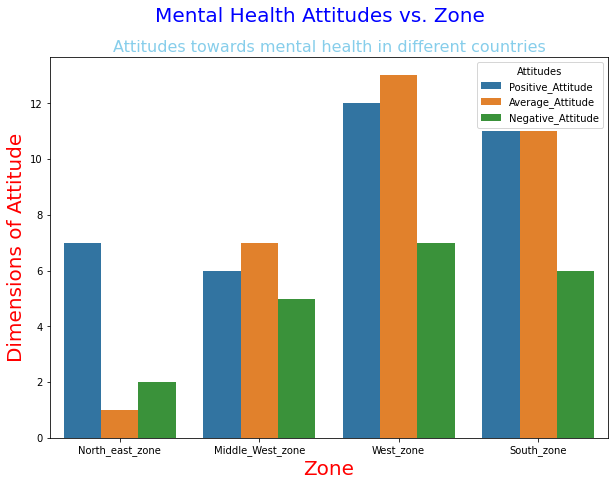

None


In [37]:
# Display the relationship between "mental_health_consequence" that is attitudes and "Zone"

plt.figure(figsize=(10,7))
sns.countplot(x="Zone", hue="Attitudes", hue_order = ["Positive_Attitude", "Average_Attitude", "Negative_Attitude"], data=df2)
plt.suptitle("Mental Health Attitudes vs. Zone", fontsize=20, color ='blue')
plt.title("Attitudes towards mental health in different countries", fontsize=16, color= 'skyblue')
plt.xlabel("Zone",fontsize=20, color='red')
plt.ylabel("Dimensions of Attitude",fontsize=20, color='red')
print(plt.show())

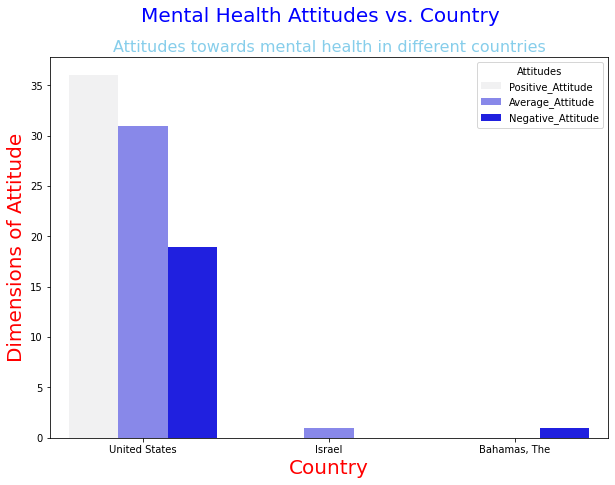

None


In [38]:
# Display the relationship between "mental_health_consequence" that is attitudes and "countries"

plt.figure(figsize=(10,7))
sns.countplot(x="Country", hue="Attitudes", hue_order = ["Positive_Attitude", "Average_Attitude", "Negative_Attitude"], color='blue', data=df2)
plt.suptitle("Mental Health Attitudes vs. Country", fontsize=20, color ='blue')
plt.title("Attitudes towards mental health in different countries", fontsize=16, color= 'skyblue')
plt.xlabel("Country",fontsize=20, color='red')
plt.ylabel("Dimensions of Attitude",fontsize=20, color='red')
print(plt.show())